In [1]:
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt

import sys
from pathlib import Path, PurePath
sys.path.append(str(PurePath(Path().resolve(), '..')))

from utils.preprocess import preprocess
from models.fully_connected_nn import build_model

Using TensorFlow backend.


In [2]:
# setting parameters
batch_size = 128
num_classes = 10
epochs = 1

# loading datasets
(X_train, y_train),(X_test, y_test) = mnist.load_data()

# preprocess data
X_train, y_train, X_test, y_test = preprocess(X_train, y_train, X_test, y_test, num_classes)

# split train & validation data
X_train, X_valid = np.split(X_train, [50000])
y_train, y_valid = np.split(y_train, [50000])

# build model
model = build_model()

# fitting model to training data
fit = model.fit(X_train, y_train,
                batch_size=batch_size,
                epochs=epochs,
                verbose=1,
                validation_data=(X_valid,y_valid))

# evaluate model
score = model.evaluate(X_test, y_test, verbose=0)
predict_classes = model.predict_classes(X_test)
print("loss for test data:", score[0])
print("accuracy for test data:", score[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/1
50000/50000 [==============================] - 11s 218us/step - loss: 1.3509 - acc: 0.6462 - val_loss: 0.6178 - val_acc: 0.8550
loss for test data: 0.6324649608612061
accuracy for test data: 0.8482


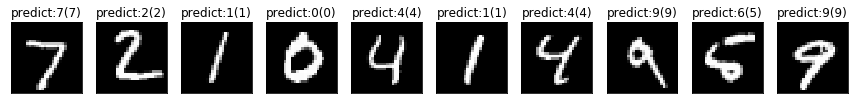

In [7]:
num = 10
fig = plt.figure(figsize=(15, 25))
for i in range(num):
    ax = fig.add_subplot(1,num,i+1, xticks=[], yticks=[])
    ax.set_title("predict:{0}({1})".format(predict_classes[i], np.argmax(y_test[i])))
    ax.imshow(X_test[i].reshape((28, 28)), cmap='gray')